In [33]:
import pandas as pd
import numpy as np # linear algebra

import missingno as msn

# import libraries for plotting
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv') # Membaca dataset pasien yang mengalami gagal jantung
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.head() # Check dataset baris teratas

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.tail() # Check dataset baris terbawah

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
df.info() # Check jumlah baris, jumlah kolom, tipe data setiap kolom, dan jumlah nilai yang tidak null dalam setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Info dataset tersebut menunjukan bahwa tidak ada nilai null pada dataset dan nilainya numerik. Meskipun ada 3 nilai float dalam kumpulan data, ada 10 tipe data int

In [7]:
df.shape # Check jumlah baris dan kolom

(299, 13)

**Baris 299**

**Kolom 13**

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data Cleaning

In [9]:
df = df.rename(columns={'time': 'day'}) # Mengubah nama kolom 'time' menjadi 'day'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  day                       299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
# Check missing values pada masing-masing kolom
df_mv = pd.DataFrame(df.isna().sum()).reset_index()
df_mv.columns = ['Features','Missing Values']
df_mv

,Features,Missing Values
0,age,0
1,anaemia,0
2,creatinine_phosphokinase,0
3,diabetes,0
4,ejection_fraction,0
5,high_blood_pressure,0
6,platelets,0
7,serum_creatinine,0
8,serum_sodium,0
9,sex,0


Ketika missing values sama dengan 0, itu menunjukkan bahwa dataset tersebut lengkap, dan tidak ada informasi yang hilang atau tidak diketahui dalam data tersebut.

In [11]:
# Check jumlah baris yang memiliki duplikat dalam DataFrame
df.duplicated().sum()

0

Tidak ada nilai duplikat

In [12]:
# Cek nilai yang unique pada dataset

cek_nunique = df.nunique()
cek_nunique = cek_nunique.to_frame(name='Jumlah')
cek_nunique.reset_index(inplace=True)
cek_nunique.rename(columns={'index': 'Kolom'}, inplace=True)
cek_nunique

,Kolom,Jumlah
0,age,47
1,anaemia,2
2,creatinine_phosphokinase,208
3,diabetes,2
4,ejection_fraction,17
5,high_blood_pressure,2
6,platelets,176
7,serum_creatinine,40
8,serum_sodium,27
9,sex,2


In [13]:
# Check berapa banyak kolom yang memiliki nilai unik kurang dari 3
for i in df.columns:
    if df[i].nunique() < 3:
        print(i)

anaemia
diabetes
high_blood_pressure
sex
smoking
DEATH_EVENT


DEATH_EVENT adalah kolom yang memiliki nilai 1 dan 0 di dalamnya

## EXPLORASI DATA

In [14]:
df.describe().T.reset_index().rename(
    columns={'index': 'Attribute'})

,Attribute,count,mean,std,min,25%,50%,75%,max
0,age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
1,anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
2,creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
3,diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
4,ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
5,high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
6,platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
7,serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
8,serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
9,sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


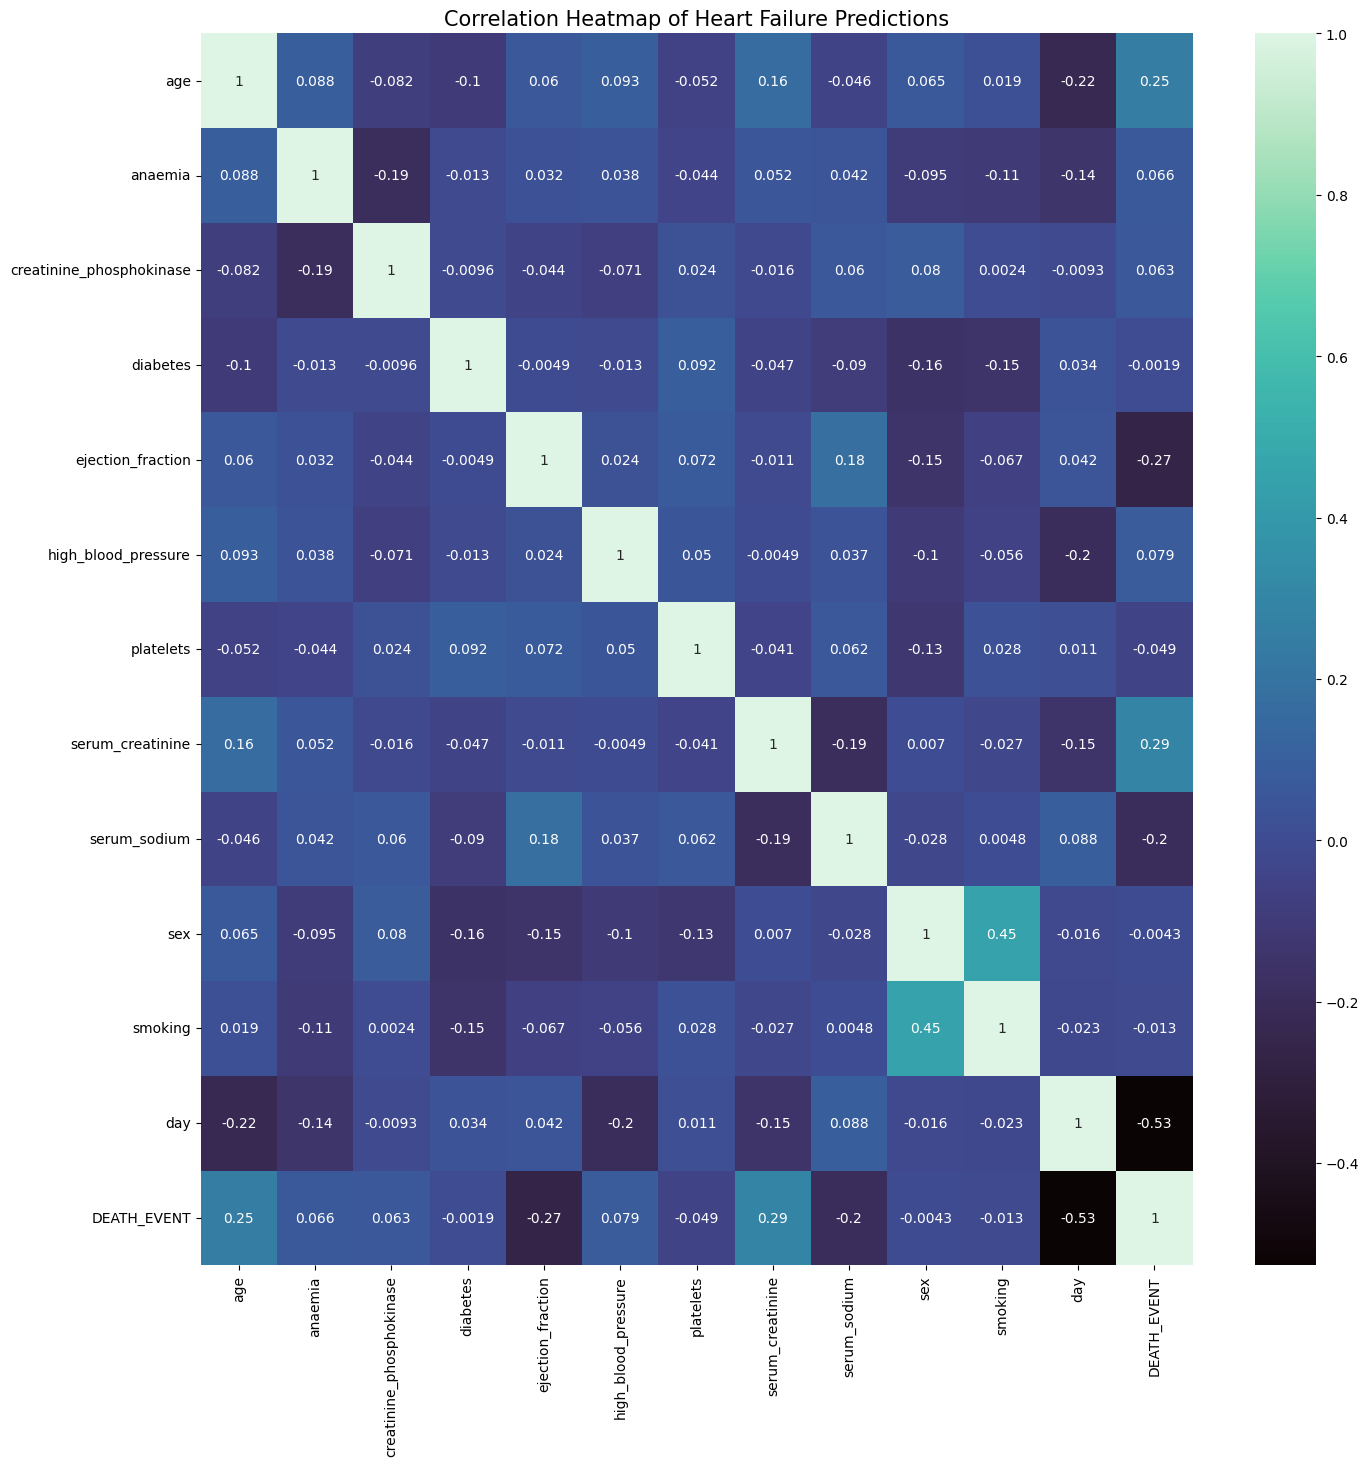

In [15]:
# correlation matrix

plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True, cmap="mako")
plt.title("Correlation Heatmap of Heart Failure Predictions",size=15)
plt.show()

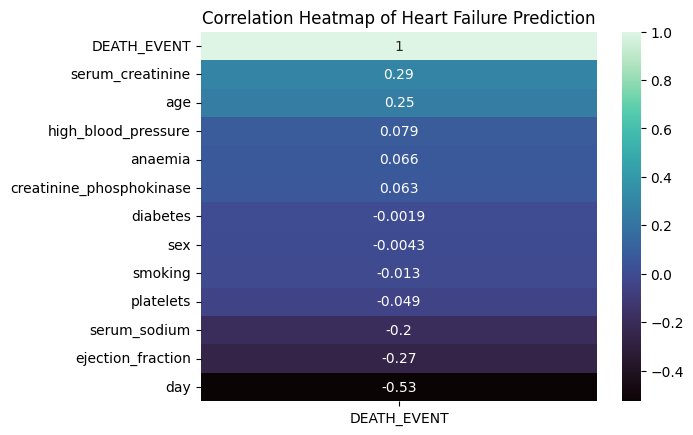

In [16]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True, cmap="mako")
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

Heatmap diatas menunjukan bahwa nilai korelasi masing-masing variabel terhadap variabel DEATH_EVENT menunjukan angka yang cukup kecil. Variabel yang memiliki korelasi cukup tinggi terhadap variabel DEATH_EVENT adalah serum_creatinine dan variabel yang memiliki korelasi sangat rendah terhadap variabel DEATH_EVENT adalah variabel day.

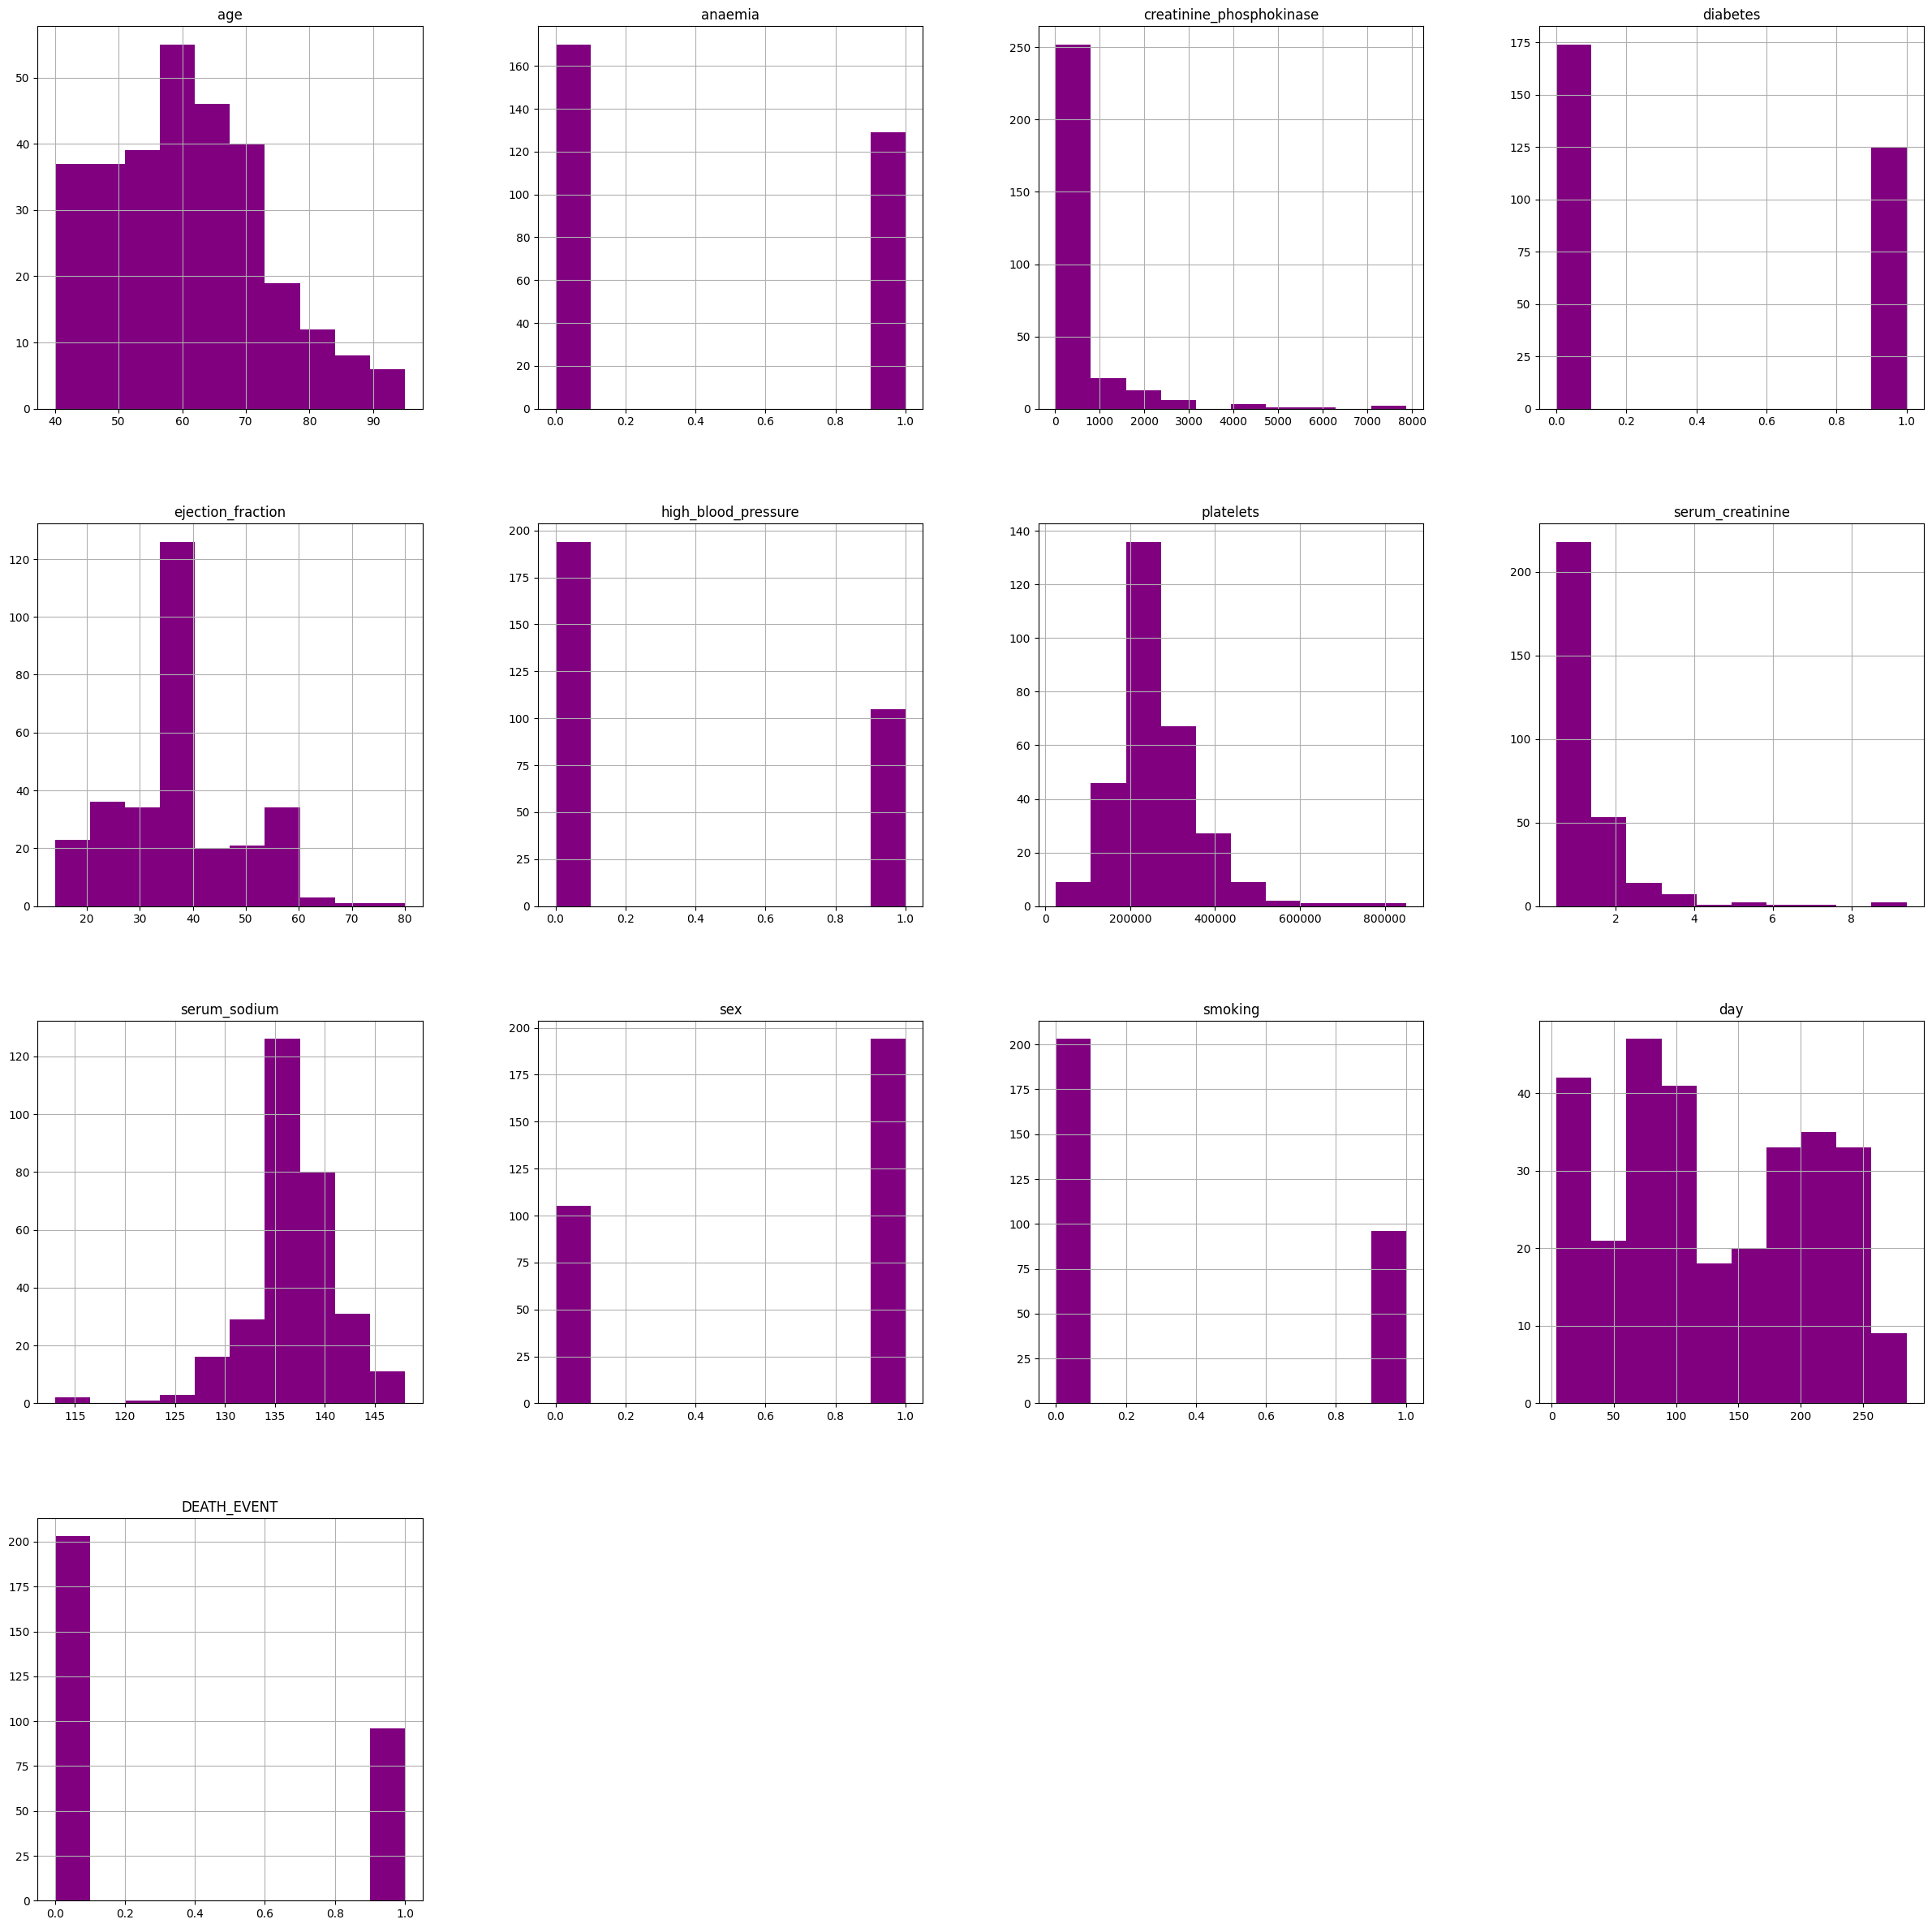

In [17]:
# Pesebaran data

df.hist(figsize = (30,30),color="purple")
plt.show()

**a.** Dari distribusi data tersebut, terlihat bahwa usia 60 tahun adalah yang tertinggi

**b.** Terlihat terdapat lebih dari 120 pasien yang mengalami anemia

**c.** Dari 299 pasien, kurang dari 100 pasien yang merokok

**d.** Sekitar 125 dari pasien menderita diabetes

**e.** Sebagian besar pasien adalah laki-laki

**f.** Kurang dari 100 pasien meninggal

In [18]:
# Mengelompokan Fitur berdasarkan Category dan Numerik

col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 2:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium day


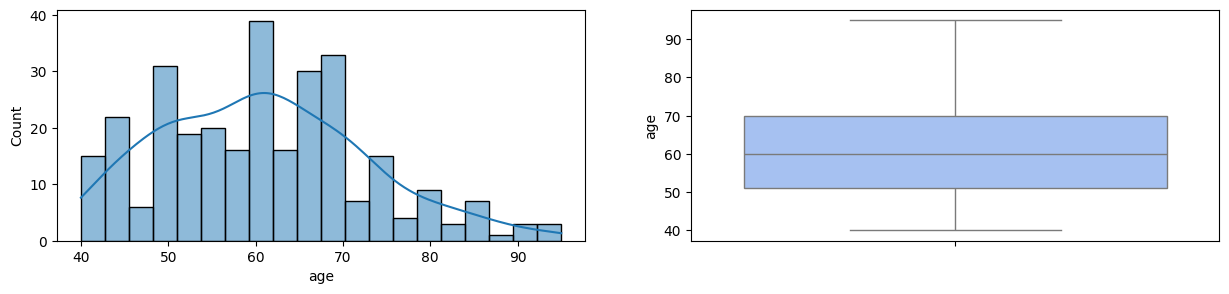

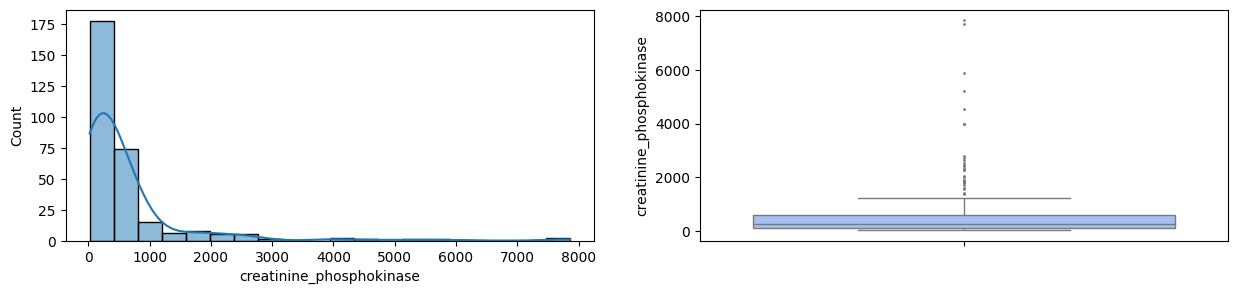

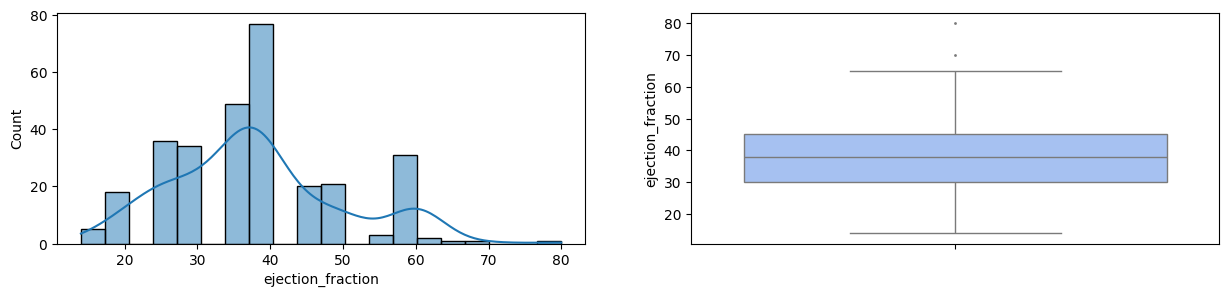

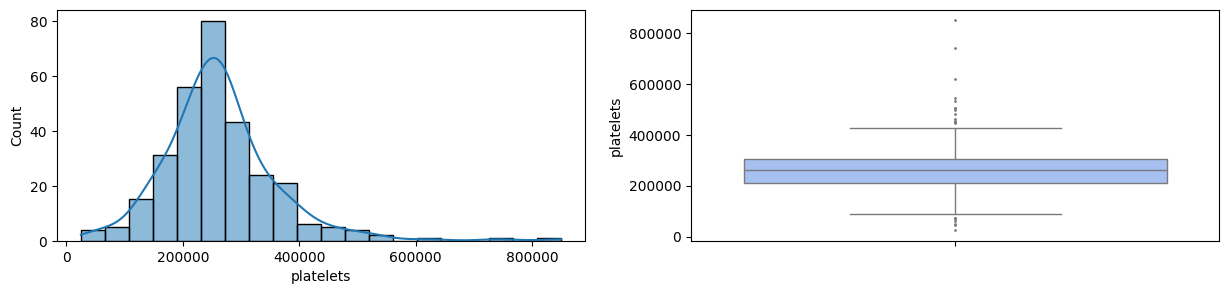

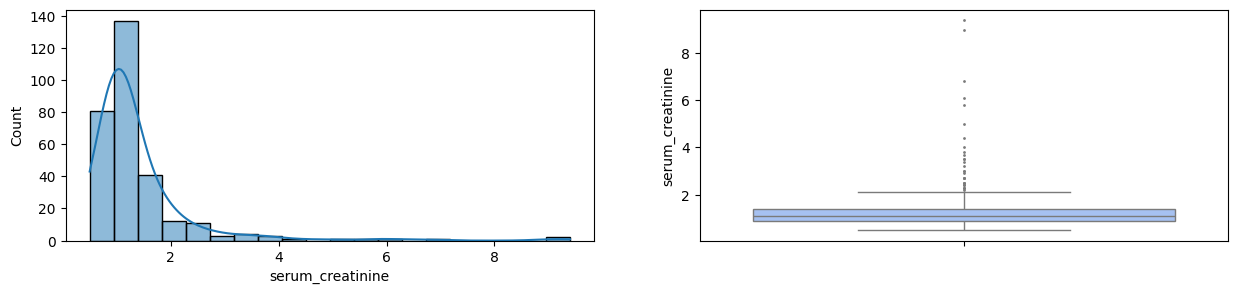

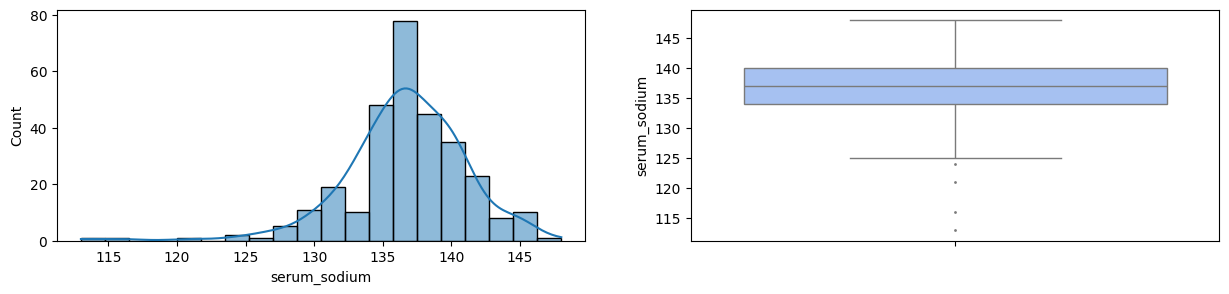

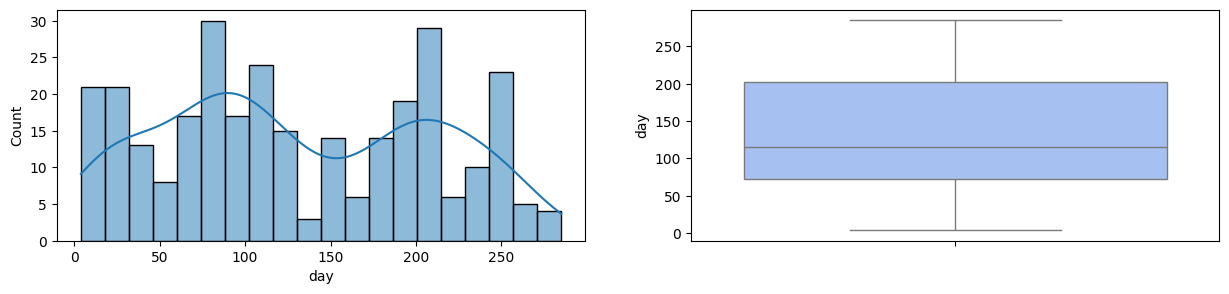

In [19]:
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "day"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

Berdasarkan visualisasi di atas dapat diketahui bahwa hampir semua variabel memiliki outliers. Maka dari itu harus dilakukan penanganan pada fitur-fitur yang memiliki outliers.

**BOOLEN**

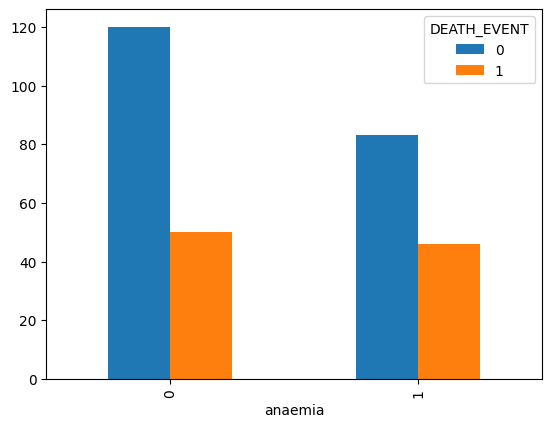

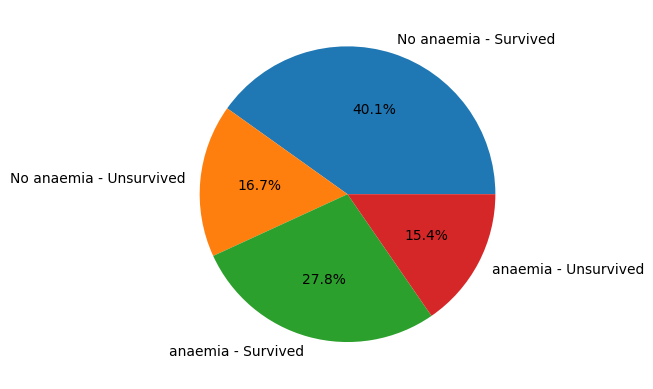

In [20]:
grouped_anaemia= df.groupby(['anaemia', 'DEATH_EVENT']).size()
grouped_anaemia.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_anaemia, labels=['No anaemia - Survived', 'No anaemia - Unsurvived', 'anaemia - Survived', 'anaemia - Unsurvived'], autopct='%1.1f%%')
plt.show()

Visualisasi anemia diatas menunjukan bahwa perbandingan antara populasi baik yang mengalami pengurangan hemoglobin (anemia) atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi populasi yang meninggal lebih banyak yang tidak mengalami penurunan hemoglobin (anemia), begitupun untuk frekuensi populasi yang tidak meninggal lebih banyak yang tidak mengalamai penurunan hemoglobin (anemia).

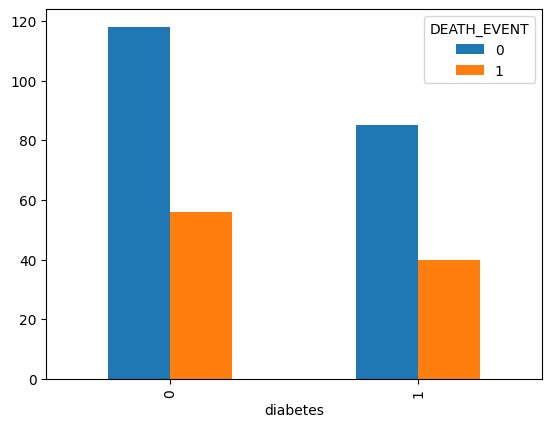

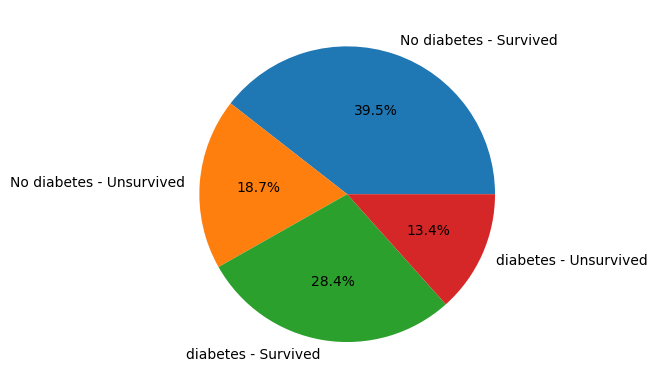

In [21]:
# Diabetes

grouped_diabetes= df.groupby(['diabetes', 'DEATH_EVENT']).size()
grouped_diabetes.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_diabetes, labels=['No diabetes - Survived', 'No diabetes - Unsurvived', 'diabetes - Survived', 'diabetes - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mengidap diabetes atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengidap diabetes, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mengidap diabetes.

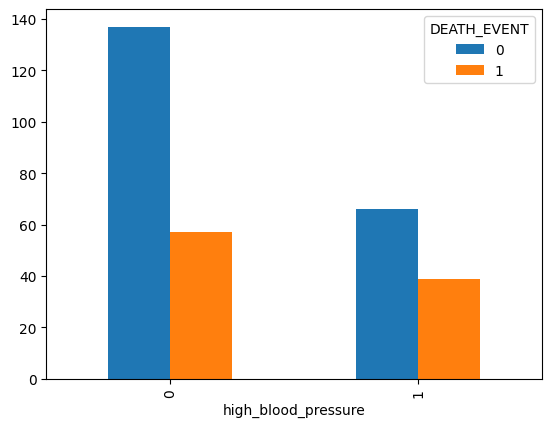

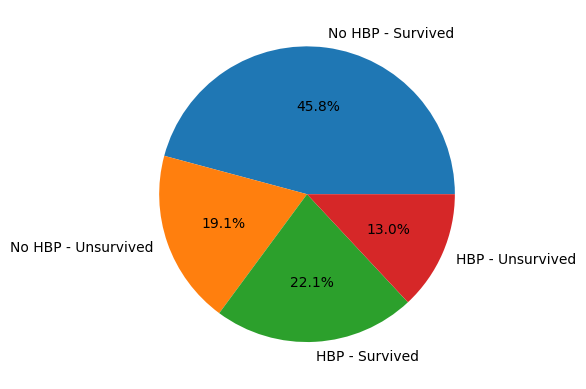

In [22]:
# high_blood_pressure

grouped_high_blood_pressure= df.groupby(['high_blood_pressure', 'DEATH_EVENT']).size()
grouped_high_blood_pressure.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_high_blood_pressure, labels=['No HBP - Survived', 'No HBP - Unsurvived', 'HBP - Survived', 'HBP - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mempunyai darah tinggi atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mempunyai darah tinggi, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mempunyai darah tinggi.

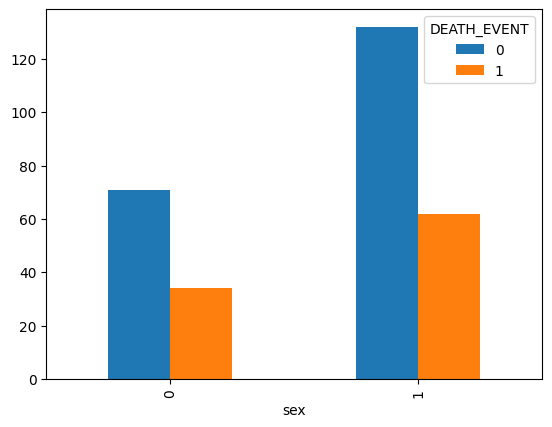

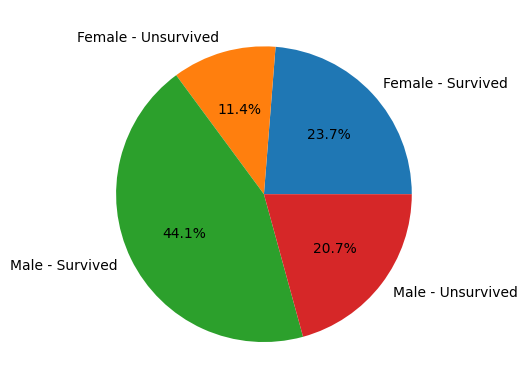

In [23]:
# Sex

grouped_sex= df.groupby(['sex', 'DEATH_EVENT']).size()
grouped_sex.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_sex, labels=['Female - Survived', 'Female - Unsurvived', 'Male - Survived', 'Male - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, frekuensi seseorang yang meninggal lebih banyak berjenis kelamin pria dibandingkan wanita, begitupun dengan frekuensi seseorang yang tidak meninggal lebih banyak yang berjenis kelamin pria.

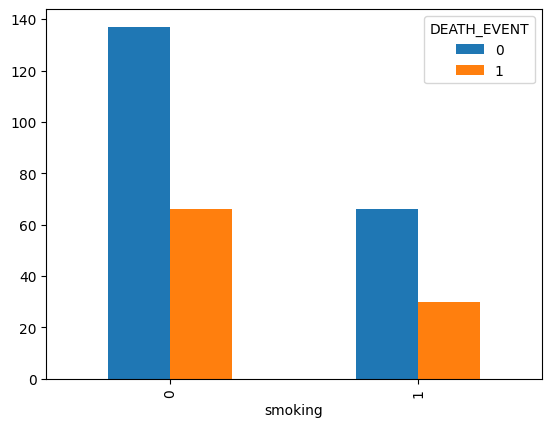

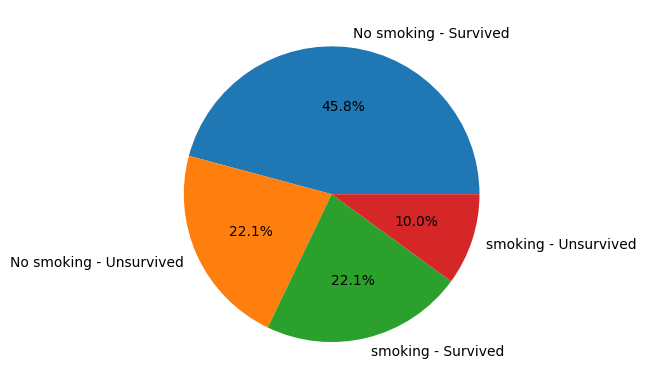

In [24]:
# smoking

grouped_smoking= df.groupby(['smoking', 'DEATH_EVENT']).size()
grouped_smoking.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_smoking, labels=['No smoking - Survived', 'No smoking - Unsurvived', 'smoking - Survived', 'smoking - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang merokok atau tidak, cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak merokok, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak merokok.

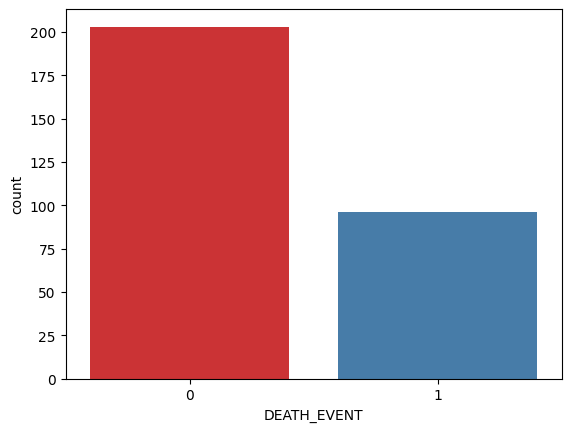

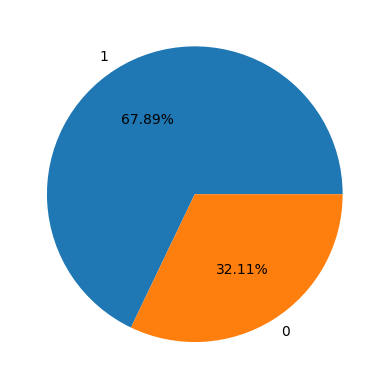

In [25]:
# DEATH_EVENT 
sns.countplot(x = 'DEATH_EVENT', data = df, palette = 'Set1')
plt.show()
plt.pie(x=df.DEATH_EVENT.value_counts().values,labels=df.DEATH_EVENT.unique().tolist(),autopct='%1.2f%%') 
plt.show()

Pada visualisasi di atas, dapat terlihat bahwa kolom DEATH_EVENT menunjukan data yang imbalanced. Imbalnaced sendiri merupakan suatu keadaan dimana distribusi kelas data tidak seimbang, jumlah kelas data (instance) yang satu lebih sedikit atau lebih banyak dibanding dengan jumlah kelas data lainnya. Selanjutnya akan kami lakukan penanganan agar data menjadi seimbang

## DATA PREPROCESSING

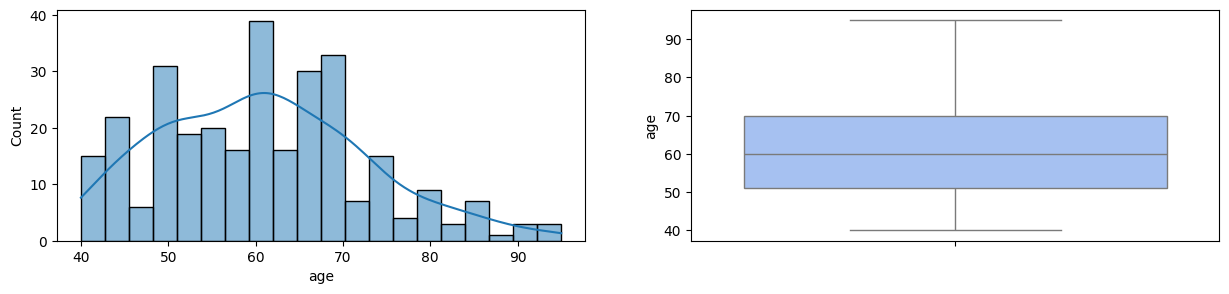

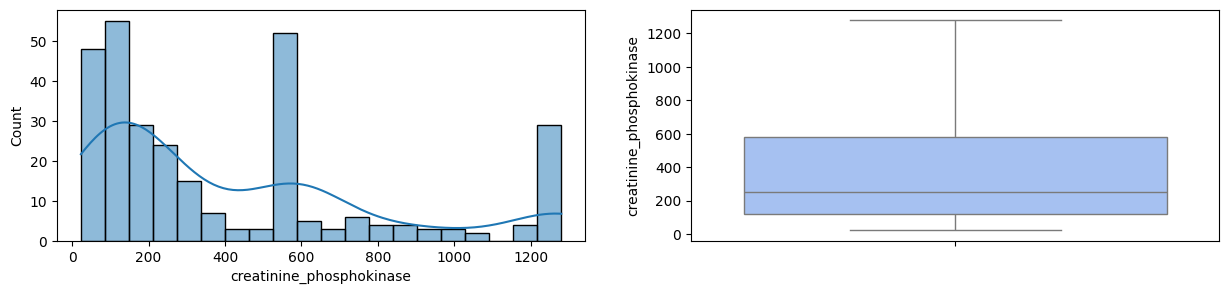

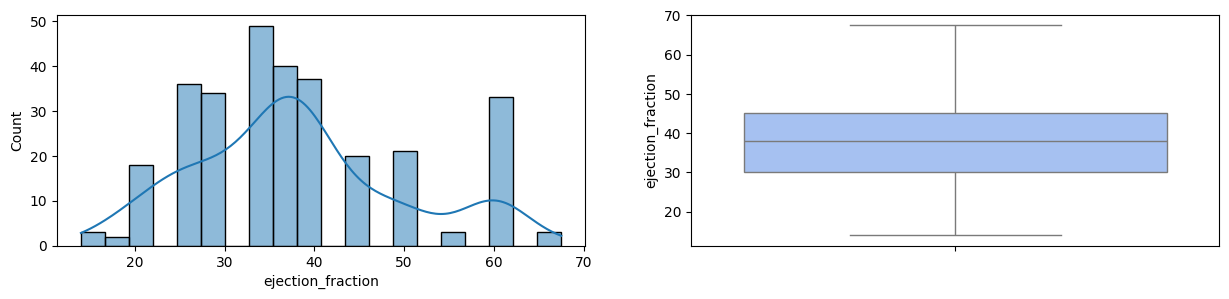

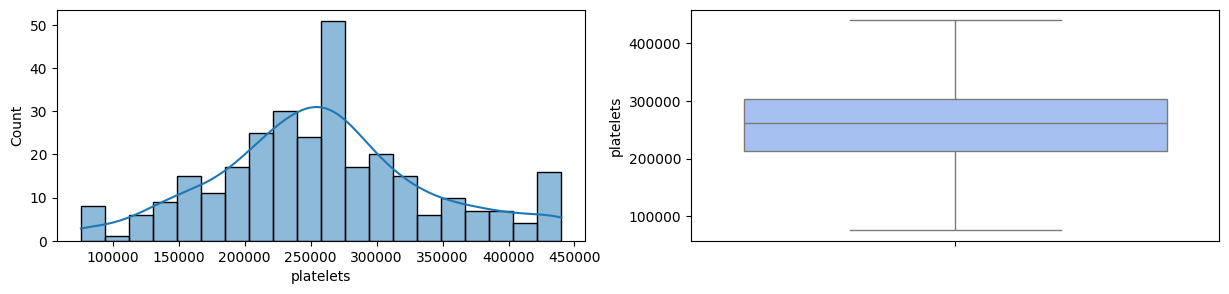

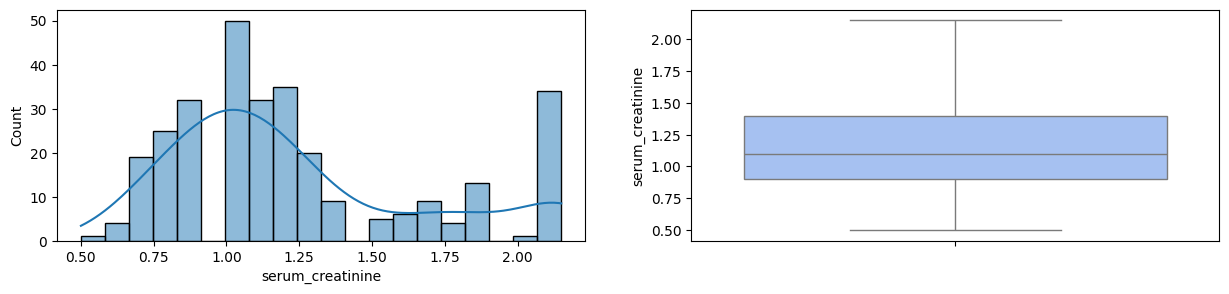

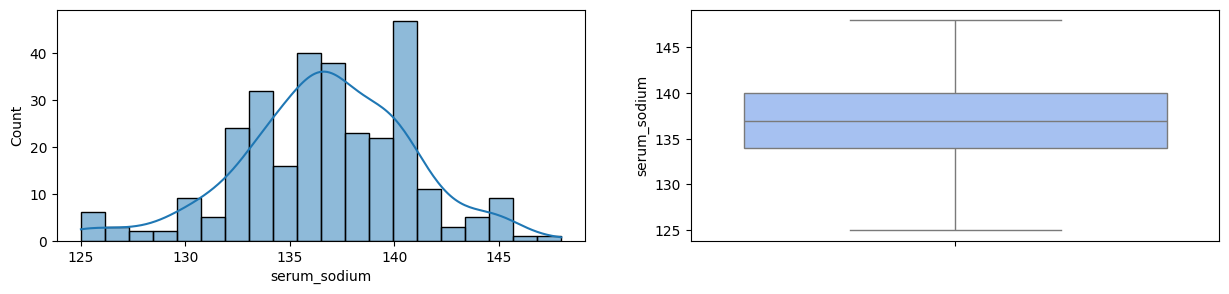

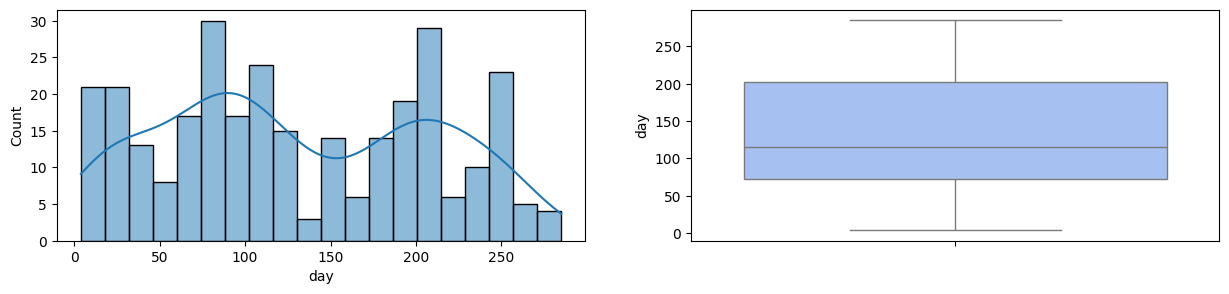

In [26]:
data = df.copy()

# Handling outlier

features_with_outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature]<lower_limit,feature] = lower_limit
    data.loc[data[feature]>upper_limit,feature] = upper_limit
    
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "day"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

Pada visualisasi di atas bahwa sudah tidak ada outliers dan data memiliki persebaran yang baik.

In [42]:
# independent dan dependent variables
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

# Train, Test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# standardizing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

accuracy_list= []

**Fungsi untuk mengukur metrik evaluasi**

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve_custom(model, X_test, y_test):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Function to evaluate and visualize
def evaluate(model, y_pred, X_train, X_test, y_train, y_test):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    plot_confusion_matrix(y_test, y_pred)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    plot_roc_curve_custom(model, X_test, y_test)
    print('\n')
    
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')

## KNN

Sesuai dengan namanya (<i>nearest neighbors</i>), algoritma ini mengklasifikasikan suatu data baru dengan melihat kedekatan data tersebut terhadap data lama yang lainnya. Contoh, kamu mempunyai dataset yang berisi informasi rumah dengan label rumah mewah dan rumah tidak mewah. KNN akan menyimpan informasi mengenai ukuran yang serupa, seperti kemiripan luas rumah dan juga harga rumah. Ketika data rumah baru masuk, KNN akan mengecek kesamaan informasi data rumah tersebut terhadap data lama yang telah dipelajari KNN. Hasil pengecekan akan dijadikan sebagai kesimpulan rumah baru tersebut masuk ke dalam klasifikasi yang mana.

Apa saja yang perlu kita perhatikan sebelum mengimplementasikan KNN?
* <b>Jumlah K</b> <br>
Jumlah K sangat menentukan performa KNN. K merepresentasikan jumlah data point terdekat, yang akan digunakan untuk menentukan suatu data point masuk ke dalam kategori apa. K yang kecil sangat rentan dengan <i>noise</i> yang dapat membuat model overfitting, sedangkan K yang besar dapat merusak aspek <i>lokalitas</i> yang berujung ke penurunan performa model klasifikasi.<br>


* <b>Rumus Jarak yang digunakan</b> <br>
Rumus jarak yang digunakan untuk menghitung kedekatan data point terhadap data yang lainnya juga sangat menentukan performa dari algoritma KNN. Jika perhitungan jarak yang digunakan kurang sesuai, maka kalkulasi similarity akan tidak tepat dan berujung membuat klasifikasi menjadi tidak sesuai

Pada scikit-learn, ada beberapa parameter yang perlu kita perhatikan, berikut adalah rangkuman singkatnya.

* `n_neighbor` <br>
n_neighbor merepresentasikan jumlah K yang kita gunakan, dengan default nilai adalah 5 <br>
* `algorithm` <br>
parameter algorithm merepresentasikan algoritma yang digunakan dalam mencari tetangga terdekat. Algoritma yang tersedia adalah, ball tree, kd tree, brute force, dan auto. Default nilai dari parameter ini adalah auto <br>
* `p` <br>
parameter ini merepresentasikan parameter yang digunakan untuk metric. Jika menggunakan minkowski, maka p bernilai 1 digunakan untuk manhattan distance dan p bernilai 2 untuk euclidean distance. Default dari parameter ini adalah 2, yaitu euclidean distance <br>
* `metric` <br>
parameter ini digunakan untuk menentukan rumus jarak yang dipakai. Default dari nilai ini adalah minkowski. <br>

#### Pembuatan Model KNN

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

Confusion Matrix
-----------------------------------------------------


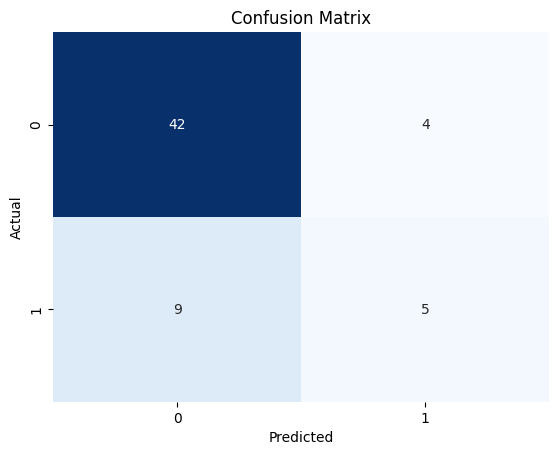



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.87        46
           1       0.56      0.36      0.43        14

    accuracy                           0.78        60
   macro avg       0.69      0.64      0.65        60
weighted avg       0.76      0.78      0.77        60



ROC Curve
-----------------------------------------------------


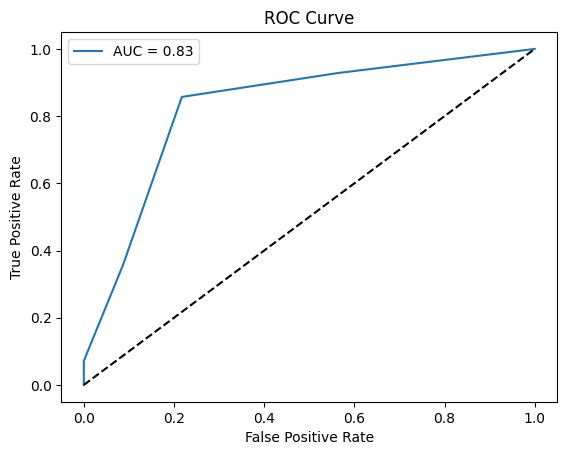



Checking model fitness
-----------------------------------------------------
Train score: 0.8033
Test score:  0.7833




In [38]:
evaluate(knn_model, X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test, y_pred=y_pred)

In [39]:
cv_scores = cross_val_score(knn_model, x_train, y_train, cv=5)
print(cv_scores)
print(f"Rata-rata skor CV: {cv_scores.mean()}")

[0.66666667 0.75       0.6875     0.72916667 0.68085106]
Rata-rata skor CV: 0.7028368794326241


#### Optimisasi Model KNN

In [41]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best score:", best_score)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best score: 0.728014184397163


In [43]:
cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
print(cv_scores)
print(f"Rata-rata skor CV: {cv_scores.mean()}")

[0.70833333 0.79166667 0.66666667 0.75       0.72340426]
Rata-rata skor CV: 0.728014184397163


#### Analisis KNN

Kesimpulan dari hasil evaluasi model adalah sebagai berikut:

- Model memiliki akurasi sebesar 0.78, yang menunjukkan kemampuan umumnya dalam melakukan klasifikasi.
- Confusion matrix memberikan insight tentang jenis kesalahan yang dibuat oleh model, dengan jumlah false positives dan false negatives yang dapat diidentifikasi.
- Classification report memberikan informasi lebih rinci tentang precision, recall, dan f1-score untuk setiap kelas. Kelas 0 memiliki performa yang lebih baik dibandingkan dengan kelas 1.
- Train score sebesar 0.8033 dan test score sebesar 0.7833 menunjukkan bahwa model cenderung tidak mengalami overfitting dan dapat menggeneralisasi pada data baru dengan baik.
- Meskipun akurasi umumnya baik, perlu dicermati metrik lain seperti precision, recall, dan f1-score, terutama jika ada ketidakseimbangan kelas dalam data.
- Selain itu, terlihat bahwa terjadi peningkatan test akurasi cross-validation pada model yang telah di optimasi, hal ini menunjukan bahwa model tersebut telah terjadi peningkatan performa yang signifikan

Secara keseluruhan, hasil evaluasi ini memberikan gambaran tentang kekuatan dan kelemahan model klasifikasi yang dikembangkan. Evaluasi lebih lanjut, terutama dengan mempertimbangkan konteks khusus dan kebutuhan bisnis, dapat membantu dalam meningkatkan atau menyesuaikan model untuk mencapai hasil yang lebih baik.
 baik.


## Logistic Regression

Logistic Regression adalah metode statistik untuk menganalisis dataset di mana terdapat satu atau lebih variabel independen yang memprediksi suatu hasil. Ini adalah jenis analisis regresi yang umum digunakan untuk memprediksi probabilitas terjadinya suatu peristiwa dengan menyesuaikan data ke kurva logistik.

Key Concept

- **Klasifikasi Biner:** Regresi Logistik cocok digunakan untuk masalah klasifikasi biner di mana variabel target memiliki dua hasil yang mungkin (0 atau 1, True atau False, Ya atau Tidak).
- **Fungsi Sigmoid:** Regresi Logistik menggunakan fungsi sigmoid untuk memodelkan probabilitas bahwa suatu instansi tertentu termasuk dalam kategori tertentu. Fungsi sigmoid menghasilkan nilai antara 0 dan 1, mewakili probabilitas.
- **Batas Keputusan:** Model menentukan batas keputusan berdasarkan fitur input, mengklasifikasikan instansi di satu sisi sebagai positif dan di sisi lain sebagai negatif.

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

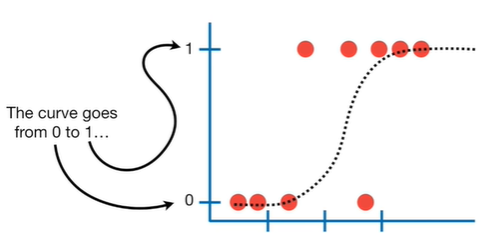

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

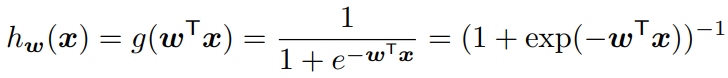

Berbeda dengan model linear regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual. 

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

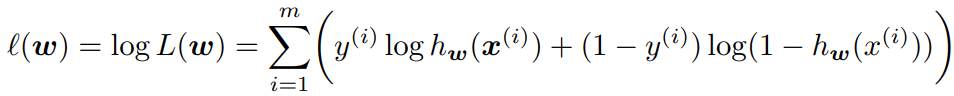


#### Pembuatan Model Logistic Regression

In [44]:
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
y_pred = logreg_model.predict(x_test)

Confusion Matrix
-----------------------------------------------------


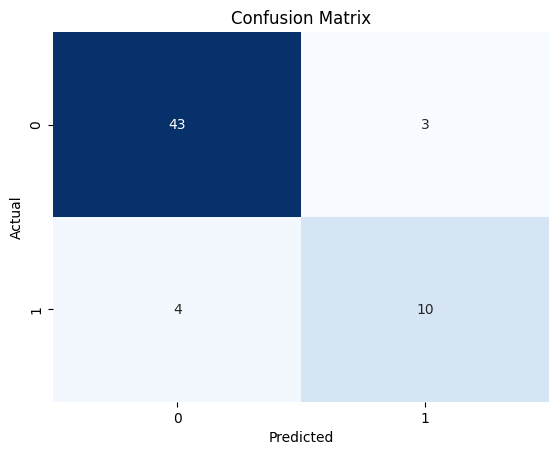



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



ROC Curve
-----------------------------------------------------


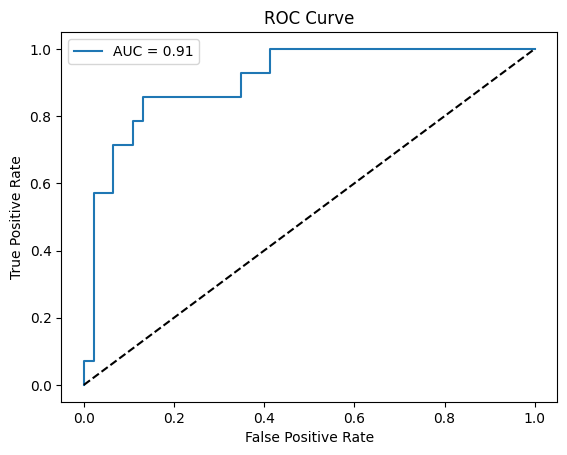



Checking model fitness
-----------------------------------------------------
Train score: 0.8243
Test score:  0.8833




In [45]:
evaluate(logreg_model, X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test, y_pred=y_pred)

In [46]:
cv_scores = cross_val_score(logreg_model, x_train, y_train, cv=5)
print(cv_scores)
print(f"Rata-rata skor CV: {cv_scores.mean()}")

[0.72916667 0.8125     0.8125     0.85416667 0.76595745]
Rata-rata skor CV: 0.7948581560283687


#### Optimisasi Model Logistic Regression

In [48]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Penalty term
}

logreg_model = LogisticRegression(solver='lbfgs')
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [52]:
cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5)
print(cv_scores)
print(f"Rata-rata skor CV: {cv_scores.mean()}")

[0.72916667 0.77083333 0.8125     0.89583333 0.78723404]
Rata-rata skor CV: 0.799113475177305


In [50]:
y_pred_best = best_estimator.predict(x_test)

Confusion Matrix
-----------------------------------------------------


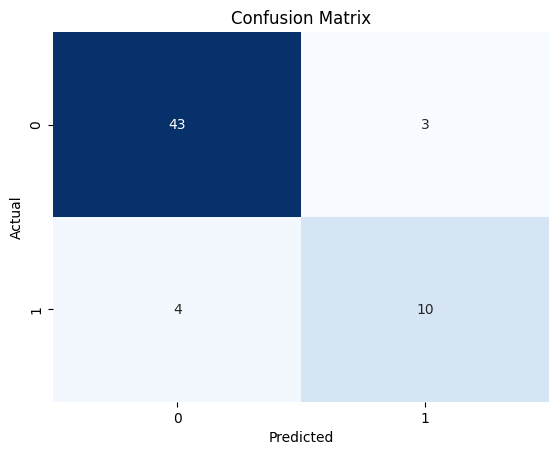



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



ROC Curve
-----------------------------------------------------


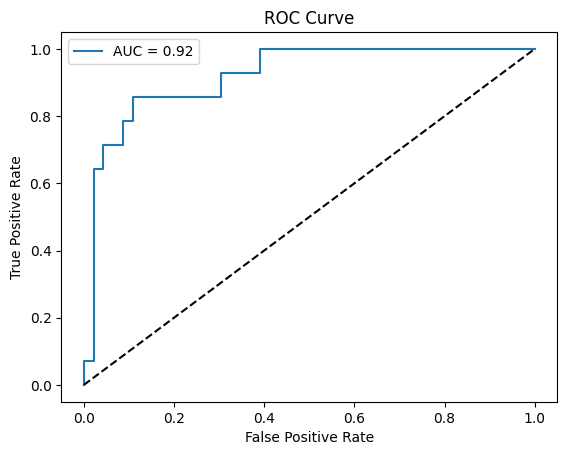



Checking model fitness
-----------------------------------------------------
Train score: 0.8201
Test score:  0.8833




In [51]:
evaluate(best_estimator, X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test, y_pred=y_pred_best)

#### Analisis Logistic Regression

Optimisasi pada model Logistic Regression menunjukkan perubahan yang relatif kecil dalam kinerja. Sebelum optimisasi, model memiliki rata-rata skor cross-validation sekitar 0.795, sedangkan setelah optimisasi, skornya meningkat sedikit menjadi sekitar 0.799. Meskipun terdapat peningkatan kecil ini, evaluasi pada data uji menunjukkan bahwa akurasi model tetap konsisten di sekitar 88%.

Hasil dari confusion matrix dan classification report juga menunjukkan bahwa tidak ada perubahan substansial dalam kemampuan model untuk memprediksi kelas target setelah proses optimisasi. Precision, recall, dan f1-score untuk kedua kelas tidak mengalami perubahan yang signifikan.

Dengan demikian, dapat disimpulkan bahwa meskipun ada upaya untuk mengoptimalkan model Logistic Regression, perubahan yang terjadi tidak cukup besar untuk menghasilkan peningkatan yang signifikan dalam kinerja model dalam memprediksi target yang dimaksud. Model masih tetap memberikan hasil yang sebanding sebelum dan setelah proses optimisasi.